## DF Fake

### DF Fake negative

In [11]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [5]:
df_fake_negative = pd.read_csv('df_fake_negative.csv')

In [6]:
df_fake_negative.head()

,content,fake,processed_text,stemmer,sentiment_score,emotions,emotion_2
0,the u s cdc quietly updated their numbers in a...,1,"['u', 'cdc', 'quietly', 'updated', 'numbers', ...","['u', 'cdc', 'quietli', 'updat', 'number', 'au...",-0.5222,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...",realization
1,social media posts shared thousands of times a...,1,"['social', 'media', 'posts', 'shared', 'thousa...","['social', 'media', 'post', 'share', 'thousand...",-0.5508,"{'fear': 0.1111111111111111, 'anger': 0.111111...",neutral
2,the cdc updated the covid 19 number to admit t...,1,"['cdc', 'updated', 'covid', '19', 'number', 'a...","['cdc', 'updat', 'covid', '19', 'number', 'adm...",-0.9193,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...",neutral
3,hydroxychloroquine is why uganda with a popul...,1,"['hydroxychloroquine', 'uganda', 'population',...","['hydroxychloroquin', 'uganda', 'popul', '43m'...",-0.5994,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...",neutral
4,the overall lethality of covid 19 infection fa...,1,"['overall', 'lethality', 'covid', '19', 'infec...","['overal', 'lethal', 'covid', '19', 'infect', ...",-0.2691,"{'fear': 0.18181818181818182, 'anger': 0.0, 'a...",neutral


In [7]:
fakes_negative_without_neutral = df_fake_negative[df_fake_negative["emotion_2"]!='neutral']
fakes_negative_without_neutral.shape

(323, 7)

In [8]:
fakes_negative_without_neutral["processed_text"]=fakes_negative_without_neutral["processed_text"].apply(lambda x: x.replace("'",""))

C:\Users\david\AppData\Local\Temp\ipykernel_10096\2404840609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fakes_negative_without_neutral["processed_text"]=fakes_negative_without_neutral["processed_text"].apply(lambda x: x.replace("'",""))


In [9]:
bigstring=fakes_negative_without_neutral["processed_text"].str.strip('[]').apply(lambda x: x.replace(",","")).str.cat(sep='')

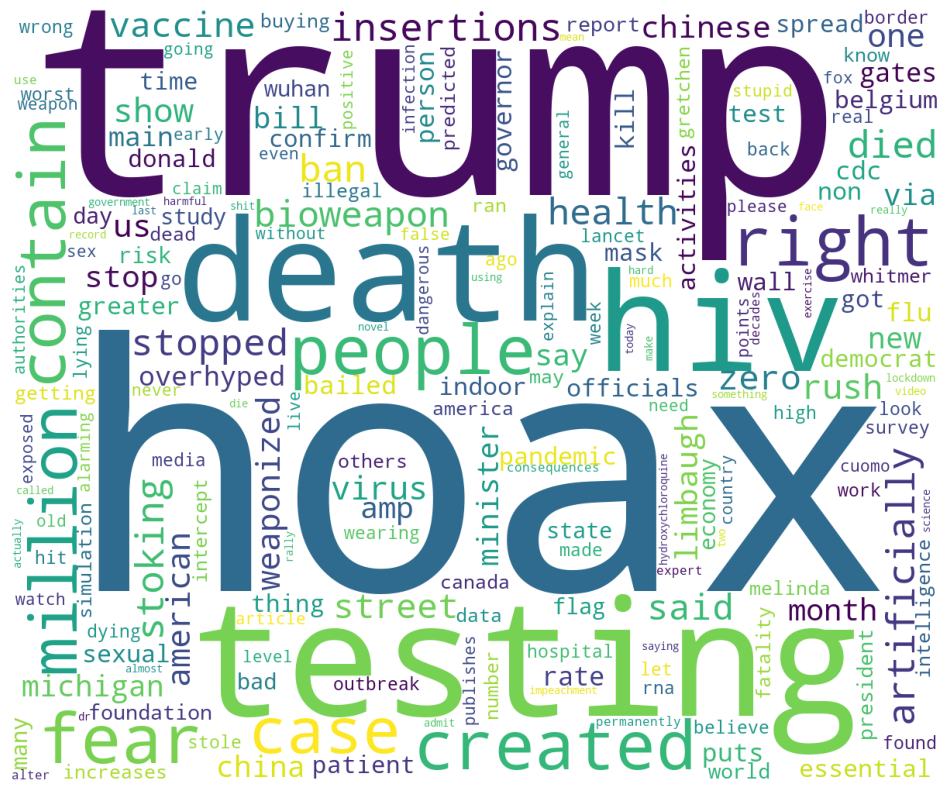

In [10]:
# wordcloud of the fake dataset

from wordcloud import WordCloud, STOPWORDS

stopwords_1=["coronavirus", "covid19","covid",'u'] + list(STOPWORDS)


plt.figure(figsize=(12,12))
wordcloud = WordCloud(stopwords=stopwords_1,
                          background_color='white',
                          collocations=False,
                          width=1200,
                          height=1000
                         ).generate(bigstring)
plt.axis('off')
plt.imshow(wordcloud)

### DF Fake positive

In [13]:
df_fake_positive = pd.read_csv('df_fake_positive.csv')

In [14]:
fakes_positive_without_neutral = df_fake_positive[df_fake_positive["emotion_2"]!='neutral']
fakes_positive_without_neutral.shape

(185, 7)

In [15]:
fakes_positive_without_neutral["processed_text"]=fakes_positive_without_neutral["processed_text"].apply(lambda x: x.replace("'",""))

C:\Users\david\AppData\Local\Temp\ipykernel_10096\723346783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fakes_positive_without_neutral["processed_text"]=fakes_positive_without_neutral["processed_text"].apply(lambda x: x.replace("'",""))


In [24]:
fakes_positive_without_neutral

,content,fake,processed_text,stemmer,sentiment_score,emotions,emotion_2
8,face masks don t protect against covid19 and o...,1,"[face, masks, protect, covid19, viruses]","['face', 'mask', 'protect', 'covid19', 'virus']",0.3818,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...",disapproval
9,u s hospital laboratories falsify covid 19 tes...,1,"[u, hospital, laboratories, falsify, covid, 19...","['u', 'hospit', 'laboratori', 'falsifi', 'covi...",0.0772,"{'fear': 0.2, 'anger': 0.0, 'anticip': 0.0, 't...",approval
19,gov andrew cuomo was simply saying if we can s...,1,"[gov, andrew, cuomo, simply, saying, share, 20...","['gov', 'andrew', 'cuomo', 'simpli', 'say', 's...",1.3228,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...",admiration
22,the us 1 200 coronavirus relief checks this ye...,1,"[us, 1, 200, coronavirus, relief, checks, year...","['us', '1', '200', 'coronaviru', 'relief', 'ch...",0.4767,"{'fear': 0.1, 'anger': 0.0, 'anticip': 0.0, 't...",optimism
25,china s communist government created the novel...,1,"[china, communist, government, created, novel,...","['china', 'communist', 'govern', 'creat', 'nov...",0.3182,"{'fear': 0.25, 'anger': 0.125, 'anticip': 0.0,...",fear
...,...,...,...,...,...,...,...
585,that s rediculous and hardly the same thing th...,1,"[rediculous, hardly, thing, cdc, recommend, dr...","['redicul', 'hardli', 'thing', 'cdc', 'recomme...",0.3612,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...",disapproval
586,6 wearing a mask is not necessary unless you a...,1,"[6, wearing, mask, necessary, unless, taking, ...","['6', 'wear', 'mask', 'necessari', 'unless', '...",0.8809,"{'fear': 0.18181818181818182, 'anger': 0.09090...",caring
587,do you have questions about your little ones a...,1,"[questions, little, ones, wearing, masks, face...","['question', 'littl', 'one', 'wear', 'mask', '...",0.3612,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...",curiosity
588,wearing a mask is not necessary unless you are...,1,"[wearing, mask, necessary, unless, taking, car...","['wear', 'mask', 'necessari', 'unless', 'take'...",0.8809,"{'fear': 0.18181818181818182, 'anger': 0.09090...",caring


In [16]:
bigstring=fakes_positive_without_neutral["processed_text"].str.strip('[]').apply(lambda x: x.replace(",","")).str.cat(sep='')

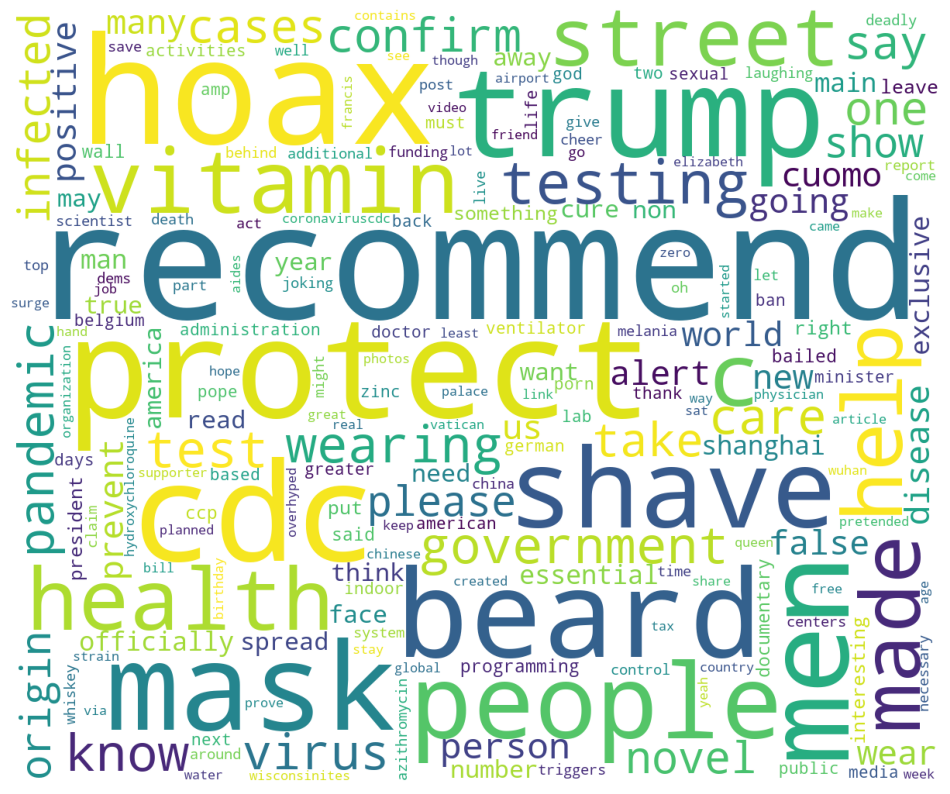

In [17]:
# wordcloud of the fake dataset

from wordcloud import WordCloud, STOPWORDS

stopwords_1=["coronavirus", "covid19","covid",'u'] + list(STOPWORDS)


plt.figure(figsize=(12,12))
wordcloud = WordCloud(stopwords=stopwords_1,
                          background_color='white',
                          collocations=False,
                          width=1200,
                          height=1000
                         ).generate(bigstring)
plt.axis('off')
plt.imshow(wordcloud)

### DF Fake neutral 

In [18]:
df_fake_neutral = pd.read_csv('df_fake_neutral.csv')

In [25]:
df_fake_neutral.head()

,content,fake,processed_text,stemmer,sentiment_score,emotions,emotion_2
0,either masks work or they don t if masks work ...,1,"['either', 'masks', 'work', 'masks', 'work', '...","['either', 'mask', 'work', 'mask', 'work', 'ph...",0.0,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...",confusion
1,the rt pcr test for the virus that causes covi...,1,"['pcr', 'test', 'virus', 'causes', 'covid', '1...","['pcr', 'test', 'viru', 'caus', 'covid', '19',...",0.0,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...",approval
2,the governor of maine has ordered restaurant s...,1,"['governor', 'maine', 'ordered', 'restaurant',...","['governor', 'main', 'order', 'restaur', 'staf...",0.0,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...",neutral
3,the survival rate of covid 19 is close to 100 ...,1,"['survival', 'rate', 'covid', '19', 'close', '...","['surviv', 'rate', 'covid', '19', 'close', '10...",0.0,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...",curiosity
4,misleading claims about covid 19 vaccine sprea...,1,"['misleading', 'claims', 'covid', '19', 'vacci...","['mislead', 'claim', 'covid', '19', 'vaccin', ...",0.0,"{'fear': 0.0, 'anger': 0.25, 'anticip': 0.0, '...",neutral


In [19]:
fakes_neutral_without_neutral = df_fake_neutral[df_fake_neutral["emotion_2"]!='neutral']
fakes_neutral_without_neutral.shape

(76, 7)

In [26]:
fakes_neutral_without_neutral["processed_text"]=fakes_neutral_without_neutral["processed_text"].apply(lambda x: x.replace("'",""))

C:\Users\david\AppData\Local\Temp\ipykernel_10096\806745643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fakes_neutral_without_neutral["processed_text"]=fakes_neutral_without_neutral["processed_text"].apply(lambda x: x.replace("'",""))


In [27]:
bigstring=fakes_neutral_without_neutral["processed_text"].str.strip('[]').apply(lambda x: x.replace(",","")).str.cat(sep='')

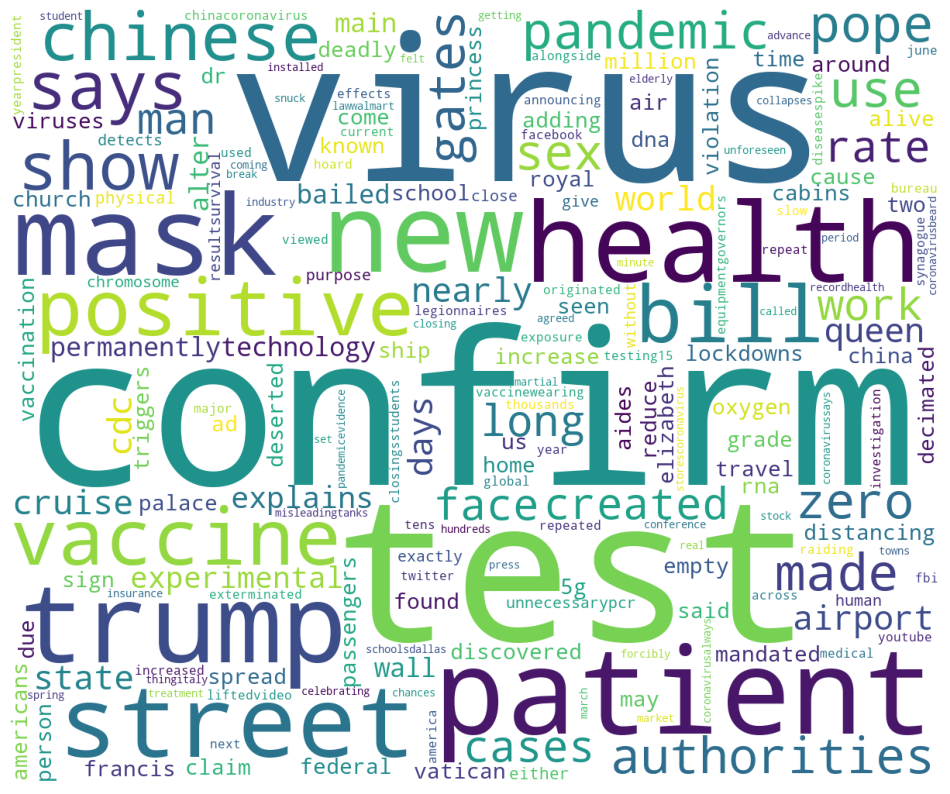

In [29]:
# wordcloud of the fake dataset

from wordcloud import WordCloud, STOPWORDS

stopwords_1=["coronavirus", "covid19","covid",'u'] + list(STOPWORDS)


plt.figure(figsize=(12,12))
wordcloud = WordCloud(stopwords=stopwords_1,
                          background_color='white',
                          collocations=False,
                          width=1200,
                          height=1000
                         ).generate(bigstring)
plt.axis('off')
plt.imshow(wordcloud)

## DF Real

### DF Real negative

In [30]:
df_real_negative = pd.read_csv('df_real_negative.csv')

In [31]:
real_negative_without_neutral = df_real_negative[df_real_negative["emotion_2"]!='neutral']
real_negative_without_neutral.shape

(7820, 7)

In [32]:
real_negative_without_neutral["processed_text"]=real_negative_without_neutral["processed_text"].apply(lambda x: x.replace("'",""))

C:\Users\david\AppData\Local\Temp\ipykernel_10096\3959912363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_negative_without_neutral["processed_text"]=real_negative_without_neutral["processed_text"].apply(lambda x: x.replace("'",""))


In [33]:
bigstring=real_negative_without_neutral["processed_text"].str.strip('[]').apply(lambda x: x.replace(",","")).str.cat(sep='')

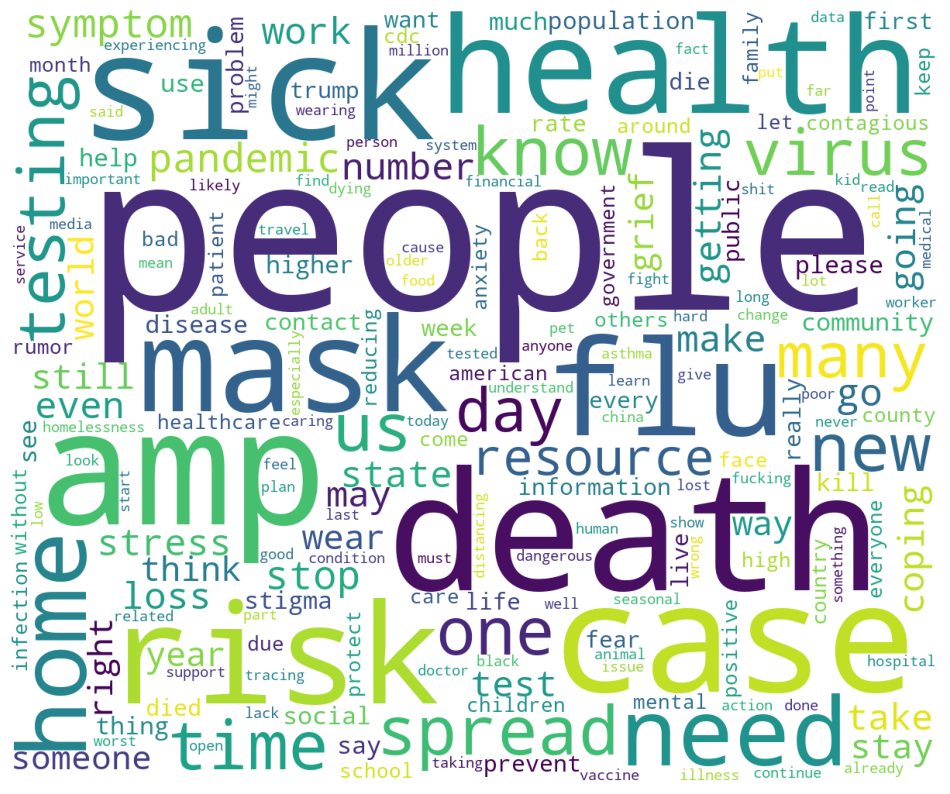

In [34]:
# wordcloud of the fake dataset

from wordcloud import WordCloud, STOPWORDS

stopwords_1=["coronavirus", "covid19","covid",'u'] + list(STOPWORDS)


plt.figure(figsize=(12,12))
wordcloud = WordCloud(stopwords=stopwords_1,
                          background_color='white',
                          collocations=False,
                          width=1200,
                          height=1000
                         ).generate(bigstring)
plt.axis('off')
plt.imshow(wordcloud)

### DF Real positive

In [35]:
df_real_positive = pd.read_csv('df_real_positive.csv')

In [36]:
real_positive_without_neutral = df_real_positive[df_real_positive["emotion_2"]!='neutral']
real_positive_without_neutral.shape

(16786, 7)

In [37]:
real_positive_without_neutral["processed_text"]=real_positive_without_neutral["processed_text"].apply(lambda x: x.replace("'",""))

C:\Users\david\AppData\Local\Temp\ipykernel_10096\3302666723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_positive_without_neutral["processed_text"]=real_positive_without_neutral["processed_text"].apply(lambda x: x.replace("'",""))


In [38]:
bigstring=real_positive_without_neutral["processed_text"].str.strip('[]').apply(lambda x: x.replace(",","")).str.cat(sep='')

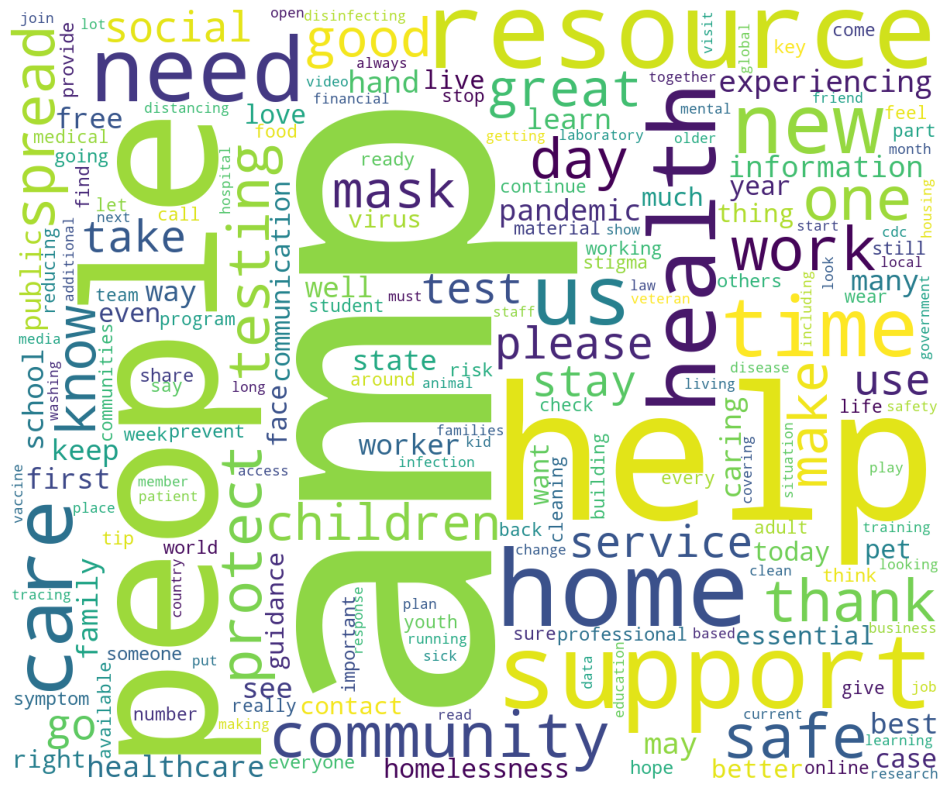

In [39]:
# wordcloud of the fake dataset

from wordcloud import WordCloud, STOPWORDS

stopwords_1=["coronavirus", "covid19","covid",'u'] + list(STOPWORDS)


plt.figure(figsize=(12,12))
wordcloud = WordCloud(stopwords=stopwords_1,
                          background_color='white',
                          collocations=False,
                          width=1200,
                          height=1000
                         ).generate(bigstring)
plt.axis('off')
plt.imshow(wordcloud)

### DF Real neutral

In [40]:
df_real_neutral = pd.read_csv('df_real_neutral.csv')

In [41]:
real_neutral_without_neutral = df_real_neutral[df_real_neutral["emotion_2"]!='neutral']
real_neutral_without_neutral.shape

(3833, 7)

In [42]:
real_neutral_without_neutral["processed_text"]=real_neutral_without_neutral["processed_text"].apply(lambda x: x.replace("'",""))

C:\Users\david\AppData\Local\Temp\ipykernel_10096\2122496650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_neutral_without_neutral["processed_text"]=real_neutral_without_neutral["processed_text"].apply(lambda x: x.replace("'",""))


In [43]:
bigstring=real_neutral_without_neutral["processed_text"].str.strip('[]').apply(lambda x: x.replace(",","")).str.cat(sep='')

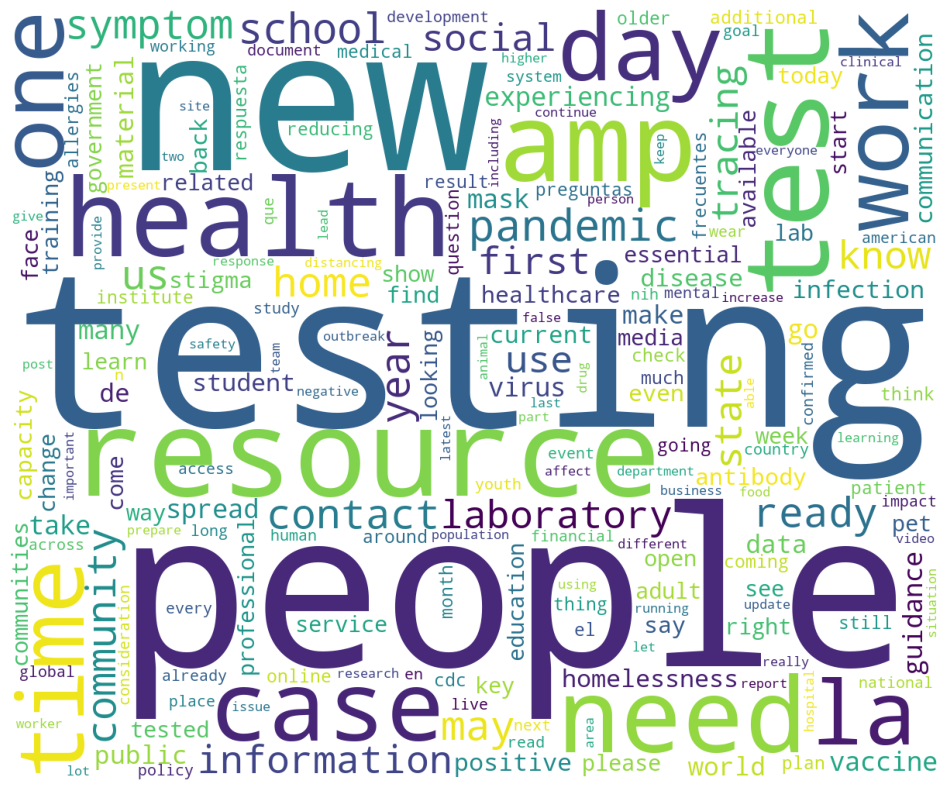

In [44]:
# wordcloud of the fake dataset

from wordcloud import WordCloud, STOPWORDS

stopwords_1=["coronavirus", "covid19","covid",'u'] + list(STOPWORDS)


plt.figure(figsize=(12,12))
wordcloud = WordCloud(stopwords=stopwords_1,
                          background_color='white',
                          collocations=False,
                          width=1200,
                          height=1000
                         ).generate(bigstring)
plt.axis('off')
plt.imshow(wordcloud)